
# SIP Lab 3 : Discrete cosine transform, Introduction to JPEG.

### Basile Mouret, Malik Hacini

In [156]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Exercice 1


### Question 1

It is easy to see that for $0 \leq n < L$, we have

$$
f_n = \frac{\tilde{f_n} + \tilde{f}_{-n-1}}{2}
$$

We can write $\tilde{f_n}$ as its inverse Fourier transform:

$$
\tilde{f_n} = \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{n}{2L}}.
$$

Hence, we have

\begin{align*}
f_n &= \frac{1}{2} \left( \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{n}{2L}}
+ \frac{1}{2L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \, e^{2i k \pi \frac{-n - 1}{2L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \left( e^{2i k \pi \frac{n}{2L}} + e^{-2i k \pi \frac{n + 1}{2L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} \hat{\tilde{f_k}} \left( e^{-i k \pi \frac{1}{2L}} \, e^{i k \pi \frac{n + 1/2}{L}} + e^{-i k \pi \frac{1}{2L}} \, e^{-i k \pi \frac{n + 1/2}{L}} \right) \\
&= \frac{1}{4L} \sum_{k=0}^{2L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cdot 2 \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr) \\
&= \frac{1}{2L} \sum_{k=0}^{L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr)
+ \frac{1}{2L} \sum_{k=L}^{2L - 1} e^{-i k \pi \frac{1}{2L}} \, \hat{\tilde{f_k}} \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr).
\end{align*}


We can now rewrite the second term using the index substitution $u = 2L - k \Rightarrow k = 2L - u$:

\begin{align*}
S_2 &= \frac{1}{2L} \sum_{u=1}^{L} e^{-i \, (2L - u)\pi \,/\, 2L} \, \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( (2L - u) \pi \frac{n + 1/2}{L} \Bigr) \\
&= \frac{1}{2L} \sum_{u=1}^{L} - e^{i u \pi / 2L}  \, \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( u \pi \frac{n + 1/2}{L} \Bigr) .
\end{align*}

We now notice that the term for $u = L$ vanishes thanks to the cosine. Adding the term for $u = 0$, we get

$$
S_2 = \frac{1}{2L} \Biggl( \hat{\tilde{f_0}} + \sum_{u=0}^{L - 1} \Bigl( - e^{i u \pi / 2L} \Bigr) \hat{\tilde{f}}_{2L -  u} \,
\cos\!\Bigl( u \pi \frac{n + 1/2}{L} \Bigr) \Biggr).
$$

Then, plugging $S_2$ back into the expression for $f_n$, using
$\hat{\tilde{f_0}} = \hat{\tilde{f_0}} \cos\!\bigl(0 \cdot \pi \tfrac{n + 1/2}{L}\bigr)$
and combining the sums yields

$$
f_n = \sum_{k=0}^{L - 1} a_k \cos\!\Bigl( k \pi \frac{n + 1/2}{L} \Bigr)
\quad
a_k =
\begin{cases}
\dfrac{1}{2L} \, \hat{\tilde{f_0}}, & \text{for } k = 0, \\[6pt]
\dfrac{1}{2L} \bigl( e^{-i k \pi / 2L} \, \hat{\tilde{f_k}} - e^{i k \pi / (2L)} \, \hat{\tilde{f}}_{2L - k} \bigr), & \text{for } 1\le k < L.
\end{cases}
$$

Using $\hat{\tilde{f}}_{2L - k} = \overline{\hat{\tilde{f_k}}}$, we finally get

$$
a_k =
\begin{cases}
\dfrac{1}{2L} \, \hat{\tilde{f_0}}, & \text{for } k = 0, \\[6pt]
\dfrac{i}{L} \,\Im\!\bigl( e^{-i k \pi / 2L} \, \hat{\tilde{f_k}} \bigr), & \text{for }  1\le k < L .
\end{cases}
$$


### Question 2
We denote $e^{(n)} = (e_0, ..., e_{L-1})$ the considered family of $\mathbb{C}^L$. Let $k \in \{ 0, ..., L-1 \}$. We have

\begin{align}
\left\| e_k^{(n)} \right\|^2 &= \sum_{k=0}^{L-1} \left( \lambda_k \sqrt{\frac{2}{L}} \cos\left( \frac{k\pi}{L}\left( n + \frac{1}{2} \right) \right) \right)^2 \\
&= \frac{1}{L} \left( 1 + 2 \sum_{k=1}^{L-1} \cos\left( \frac{k\pi}{L}\left( n + \frac{1}{2} \right) \right) \right)^2 \\
&= \frac{1}{L} \left( 1 + 2 \cdot \frac{1}{2} \sum_{k=1}^{L-1} \left[ \cos\left( \frac{2k\pi}{L}\left( n + \frac{1}{2} \right) \right) + 1 \right] \right) \\
&= \frac{1}{L} \left( 1 + L - 1 + \sum_{k=1}^{L-1} \cos\left( \frac{2k\pi}{L}\left( n + \frac{1}{2} \right) \right) \right) \\
&= 1 + \frac{1}{L} \left( \sum_{k=1}^{L-1} \cos\left( \frac{k\pi}{L}\left( 2n + 1 \right) \right) \right).
\end{align}

The sum of cosines can be easily computed as the real part of a geometric sum of exponentials:

\begin{align}
\sum_{k=1}^{L-1} \cos\left( \frac{k\pi}{L}(2n+1) \right) &= \mathfrak{R}\left( \sum_{k=1}^{L-1} e^{i\pi \frac{k}{L}(2n+1)} \right) \\
&= \mathfrak{R}\left( e^{i\pi \frac{1}{L}(2n+1)} \frac{1 - e^{i(L-1)\pi \frac{1}{L}(2n+1)}}{1 - e^{i\pi \frac{1}{L}(2n+1)}} \right) \\
&= \mathfrak{R}\left( \frac{1 + e^{i\pi \frac{1}{L}(2n+1)}}{1 - e^{i\pi \frac{1}{L}(2n+1)}} \right) \\
&= \mathfrak{R}\left( \frac{1 + e^{iC}}{1 - e^{iC}} \right) \ \text{with} \ C = \frac{\pi}{L}(2n + 1) \in \mathbb{R} \\
&= \mathfrak{R}\left( i \frac{\cos\left( \frac{C}{2} \right)}{\sin\left( \frac{C}{2} \right)} \right) \\
&= 0.
\end{align}

Thus $\left\| e_k^{(n)} \right\| = 1.$


Now let $p \neq q$. We have
$$
\begin{align}
\langle e_k, e_p \rangle &= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{k \pi}L(n+\frac 12))cos(\frac{p \pi}L(n+\frac 12))\\
&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} cos(\frac{(k+p) \pi}L(n+\frac 12))+cos(\frac{(k-p) \pi}L(n+\frac 12))\\

&= \sum_{n=0}^{L-1} \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}L(n+\frac 12))})+\Re(e^{i(\frac{(k-p) \pi}L(n+\frac 12))})\\

&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k+p) \pi}Ln)} + e^{i(\frac{(k-p) \pi}{2L})}\sum_{n=0}^{L-1} e^{i(\frac{(k-p) \pi}Ln)})\\
&= \frac{2\lambda_k\lambda_p}{L} \Re(e^{i(\frac{(k+p) \pi}{2L})} \frac{1-e^{i((k+p)\pi}}{1-e^{\frac{i(k+p)\pi}L}}+e^{i(\frac{(k-p) \pi}{2L})} \frac{1-e^{i((k-p)\pi}}{1-e^{\frac{i(k-p)\pi}L}}).\\
\end{align}
$$
Then, $ \frac{e^{i\frac x2}}{1-e^{ix}} = \frac 1{e^{-i\frac x 2}+e^{i\frac x 2}} = i\frac 2{sin(\frac x 2)}$, hence
$$
\langle e_k, e_p \rangle = \frac{2\lambda_k\lambda_p}{L} \Re(i(\frac {1-e^{i((k+p)\pi}}{sin(\frac{(k+p) \pi}{2L})}+\frac {1-e^{i((k-p)\pi}}{sin(\frac{(k-p) \pi}{2L})})).
$$

When $k+p$ is even, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=0$,
thus $ \langle e_k, e_p \rangle = 0 $

When $k+p$ is odd, $1-e^{i((k+p)\pi}=1-e^{i((k-p)\pi}=2$ and $i(\frac {2}{sin(\frac{(k+p) \pi}{2L})}+\frac {2}{sin(\frac{(k-p) \pi}{2L})})$ is imaginary,
thus $ \langle e_k, e_p \rangle = 0 $

Thus $e^{(n)}$ is an orthonormal basis of $\mathbb{C}^L$.

### Question 3

We denote $c_k^{(n)}$ the coefficients of $f_n$ in $e_n$, such that $$ f_n = \sum_{k=0}^{L-1} c_k^{(n)} \lambda_k \sqrt{\frac{2}{L}} \cos (\frac{k \pi}{L} (n + \frac{1}{2})).$$ By uniqueness of this decomposition, we deduct that 

$$ c_k^{(n)} \lambda_k \sqrt{\frac{2}{L}} = a_k   \iff c_k^{(n)} = 
\begin{cases} 
\frac{1}{2 \sqrt{L}} \hat{\tilde f_0} & \text{if } k = 0, \\
\frac{1}{\sqrt{2L}} \mathfrak{I}(e^{-i \pi k / 2L}\hat{\tilde f_k}) & \text{if } 1 \leq k < L.

\end{cases}
 $$

### Question 4

In [168]:
def compute_coefficients(f):
    f = np.asarray(f)
    L = f.shape[0]

    tilde = np.empty(2 * L, dtype=complex)
    tilde[:L] = f
    tilde[L:] = f[::-1]

    fhat_tilde = np.fft.fft(tilde)  # length 2L

    ks = np.arange(1, L)                     
    theta = np.pi * ks / (2.0 * L)          
    exp_minus = np.exp(-1j * theta)         
    vals = exp_minus * fhat_tilde[ks]

    c = np.empty(L, dtype=float)
    c[0] = np.real(fhat_tilde[0]) / (2.0 * np.sqrt(L))
    c[1:] = (1.0 / np.sqrt(2.0 * L)) * np.real(vals)

    return c

def dct(c):
    L = len(c)
    n = np.arange(L)
    e0 = np.sqrt(1.0 / L) * np.ones(L)
    e = np.zeros((L, L), dtype=float)  
    e[0, :] = e0
    for k in range(1, L):
        e[k, :] = np.sqrt(2.0 / L) * np.cos( (k * np.pi * (n + 0.5)) / L )
    f = np.dot(e,c.real)

    return f

def idct(c):

    L = len(c)
    n = np.arange(L)
    e0 = np.sqrt(1.0 / L) * np.ones(L)
    e = np.zeros((L, L), dtype=float)  
    e[0, :] = e0
    for k in range(1, L):
        e[k, :] = np.sqrt(2.0 / L) * np.cos( (k * np.pi * (n + 0.5)) / L )
    c_real = c.real
    f_recon = np.dot(c_real, e)

    return f_recon

f = np.array([1.,2.,3.,4.,5.,6.,7.,8.])
print(idct(dct(f)))

[1. 2. 3. 4. 5. 6. 7. 8.]


### Question 5

Define the tensor-product basis of $\mathbb{C}^{L\times L}$ by
$$
E_{k,\ell}(n,m)\;:=\; e^{(k)}(n)\,e^{(\ell)}(m),
\qquad k,\ell=0,\dots,L-1,\; n,m=0,\dots,L-1.
$$

We use the Frobenius inner product on $\mathbb{C}^{L\times L}$:
$$
\langle A, C\rangle \;=\; \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} A(n,m)\,\overline{C(n,m)}.
$$


For two tensor elements $E_{k,\ell}$ and $E_{p,q}$ we have
$$
\begin{aligned}
\langle E_{k,\ell},\,E_{p,q}\rangle
&= \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} e^{(k)}(n)\,e^{(\ell)}(m)\,\overline{e^{(p)}(n)\,e^{(q)}(m)}\\[4pt]
&= \Big(\sum_{n=0}^{L-1} e^{(k)}(n)\,\overline{e^{(p)}(n)}\Big)\,
   \Big(\sum_{m=0}^{L-1} e^{(\ell)}(m)\,\overline{e^{(q)}(m)}\Big)\\[4pt]
&= \delta_{k,p}\,\delta_{\ell,q}
\end{aligned}
$$
because each $\{e^{(k)}\}_{k=0}^{L-1}$ is orthonormal in $\mathbb{C}^L$. Hence the family $\{E_{k,\ell}\}_{0\le k,\ell\le L-1}$ is orthonormal in $\mathbb{C}^{L\times L}$.


Any image $F\in\mathbb{C}^{L\times L}$ thus admits the expansion
$$
F(n,m) \;=\; \sum_{k=0}^{L-1}\sum_{\ell=0}^{L-1} C_{k,\ell}\,E_{k,\ell}(n,m)
\;=\; \sum_{k,\ell} C_{k,\ell}\, e^{(k)}(n)\,e^{(\ell)}(m)
$$
with coefficients given by
$$
C_{k,\ell} \;=\; \langle F,\,E_{k,\ell}\rangle
= \sum_{n=0}^{L-1}\sum_{m=0}^{L-1} F(n,m)\, e^{(k)}(n)\, e^{(\ell)}(m).
$$

## Exercice 2

### Question 1


(256, 256)


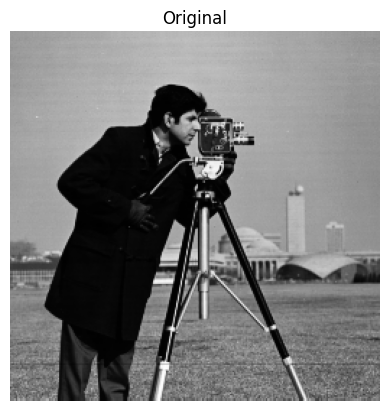

In [158]:
img = plt.imread("cameraman.png")
print(img.shape)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.show()

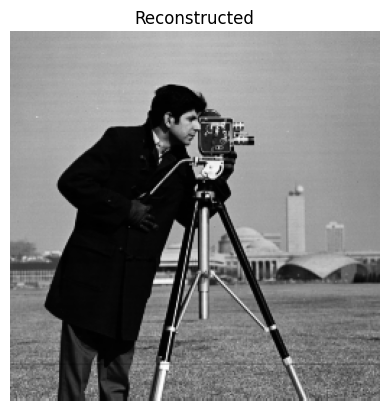

In [159]:
blocks = np.zeros((32, 32, 8, 8))
for i in range(32):
    for j in range(32):
        block = img[8*i:8*(i+1),8*j:8*(j+1)].copy()
        # apply the dct on the rows
        for r in range(8):
            block[r,:] = dct(block[r,:])
        # apply the dct on the columns
        for c in range(8):
            block[:,c] = dct(block[:,c])
        blocks[i,j] = block

reconstructed = np.zeros((256,256))
for i in range(32):
    for j in range(32):
        reconstructed[8*i:8*(i+1),8*j:8*(j+1)] = blocks[i,j].copy()
        # apply the dct on the rows
        for r in range(8):
            reconstructed[8*i+r,8*j:8*(j+1)] = idct(reconstructed[8*i+r,8*j:8*(j+1)])
        # apply the dct on the columns
        for c in range(8):
            reconstructed[8*i:8*(i+1),8*j+c] = idct(reconstructed[8*i:8*(i+1),8*j+c])


plt.imshow(reconstructed, cmap="gray")
plt.title("Reconstructed")
plt.axis("off")
plt.show()

### Question 2

For each block, the top left coefficient represents the average brightness of the block. \
The other coefficients represent the frequency components in 2D, increasing from left to right and top to bottom.

Higher-frequency coefficients (towards the bottom-right) often have smaller magnitudes and can be quantized to zero without significantly affecting image quality.

### Question 3

In [160]:
# Quantization Matrix
def get_Q(q):
    Q = np.zeros((8,8)) 
    for i in range(8):
        for j in range(8):
            Q[i,j] = 1+q*(1+i+j)
    return Q

Q5 = get_Q(5)
print("Q5 = \n",Q5)

quantized_blocks = np.zeros((32, 32, 8, 8))
for i in range(blocks.shape[0]):
    for j in range(blocks.shape[1]):
        quantized_blocks[i,j] = np.round(blocks[i,j]/Q5)

Q5 = 
 [[ 6. 11. 16. 21. 26. 31. 36. 41.]
 [11. 16. 21. 26. 31. 36. 41. 46.]
 [16. 21. 26. 31. 36. 41. 46. 51.]
 [21. 26. 31. 36. 41. 46. 51. 56.]
 [26. 31. 36. 41. 46. 51. 56. 61.]
 [31. 36. 41. 46. 51. 56. 61. 66.]
 [36. 41. 46. 51. 56. 61. 66. 71.]
 [41. 46. 51. 56. 61. 66. 71. 76.]]


### Question 4

q = 0 : 2.21% of non zero coefficients
q = 1 : 1.37% of non zero coefficients
q = 2 : 1.28% of non zero coefficients
q = 3 : 1.23% of non zero coefficients
q = 4 : 1.19% of non zero coefficients
q = 5 : 1.14% of non zero coefficients
q = 6 : 1.06% of non zero coefficients
q = 7 : 0.88% of non zero coefficients
q = 8 : 0.7% of non zero coefficients
q = 9 : 0.51% of non zero coefficients
q = 10 : 0.17% of non zero coefficients
q = 11 : 0.0% of non zero coefficients
q = 12 : 0.0% of non zero coefficients
q = 13 : 0.0% of non zero coefficients
q = 14 : 0.0% of non zero coefficients


[]

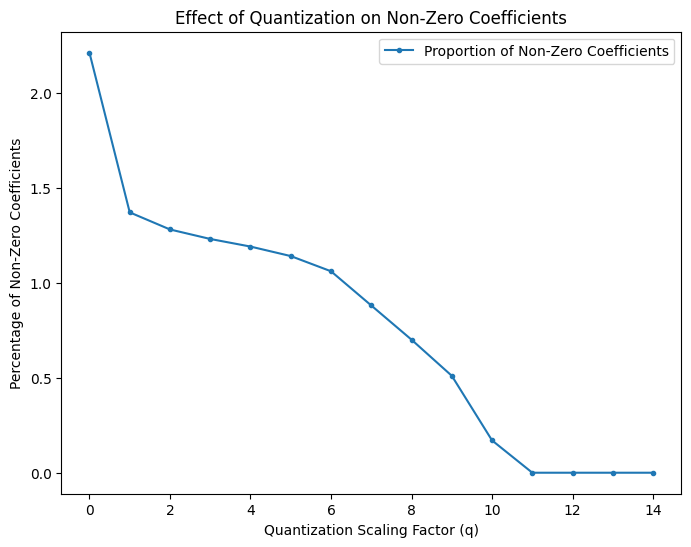

In [161]:
def compute_non_zero_prop(q):
    non_zero=0
    Q = get_Q(q)
    quantized_blocks = np.zeros((32, 32, 8, 8))
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            quantized_blocks[i,j] = np.round(blocks[i,j]/Q)
            non_zero+=sum([(quantized_blocks[i,j,x,y]!=0)for x in range(8) for y in range(8)])
    return round(non_zero/(256*256) * 100,2)

proportions = [[],[]]  
for q in range(15):
    prop = compute_non_zero_prop(q)
    print("q = ",q, " : ", prop, "% of non zero coefficients", sep="")
    proportions[0].append(q)
    proportions[1].append(prop)

plt.figure(figsize=(8, 6))
plt.plot(*proportions,".-", label='Proportion of Non-Zero Coefficients')
plt.xlabel('Quantization Scaling Factor (q)')
plt.ylabel('Percentage of Non-Zero Coefficients')
plt.title('Effect of Quantization on Non-Zero Coefficients')
plt.legend()   
plt.plot()

We notice that the proportion of non-zero coefficients is a decreasing function of $q$ that converges to $0$, which was to be expected. For our specific image, it basically drops to $0$ for $q > 10$.

### Question 5

The DCT tends to concentrate most of the signal's energy in the lower-frequency components (top-left corner of the matrix). By scanning in a zig-zag pattern, these significant coefficients are placed at the beginning of the sequence. Afterwards, we get long sequences of zeros (low energy), that can thus be easily compressed (for example using run length encoding) since these sequences have very low entropy. Hence this choice of pattern : it optimizes well the compression ratio we can get via encoding.

However, zig-zag scanning is a heuristic and not an exact sort by energy, but it works very well in practice.